In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# import numpy as np
import scipy as sp
import pandas as pd

import autograd.numpy as np
from autograd import grad



In [45]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.zeros([len(x), len(y)])

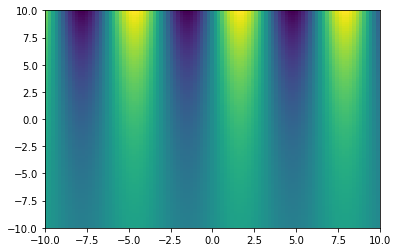

In [49]:
def f(x, y): return np.sin(x) * np.exp(y/10)
for i in xrange(len(x)):
    for j in xrange(len(y)):
        z[j, i] = f(x[i], y[j])

plt.pcolor(x, y, z)
plt.show()

In [80]:
def f(x, y):
    z = np.zeros([len(x), len(y)])
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            z[i, j] = x[i] + np.sin(y[j]) + y[j] + np.sin(x[i]) + np.exp(y[j])
    return z

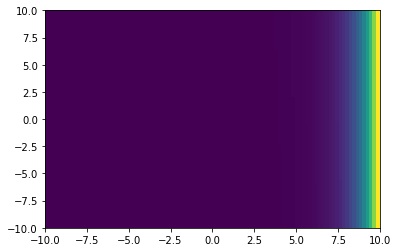

In [81]:
plt.pcolor(x,y,f(x,y))

Start CFD examples by Prof. Barba

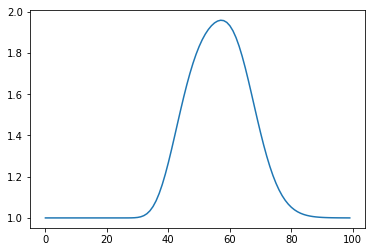

In [137]:
# 1D Linear Convection
nx = 100 # i space index
dx = 2.0 / (nx - 1) # domain is (0;2)
nt = 20 # n time index
dt = 0.01 ; c = 1

u = np.zeros(nx)
x = np.linspace(0, 2, nx)

# initial conditions
for i in range(nx):
    if 0.5 <= x[i] <= 1:
        u[i] = 2
    else:
        u[i] = 1

# simulate
for n in range(nt):
    un = u
    for i in range(1, nx-1):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

plt.plot(u)

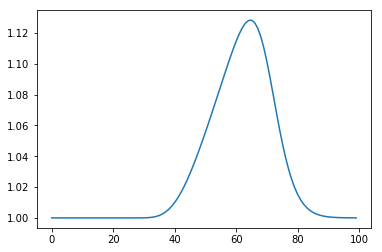

In [134]:
# 1D Convection
nx = 100 # i space index
nt = 20 # n time index
dt = 0.01
dx = 2.0 / (nx - 1) # domain is (0;2)

# u(x)
u = np.zeros(nx)
x = np.linspace(0, 2, nx)

# initial conditions
for i in range(nx):
    if 0.5 <= x[i] <= 1:
        u[i] = 2
    else:
        u[i] = 1

# simulate
for n in range(nt):
    un = u
    for i in range(1, nx-1):
        u[i] = un[i] - u[i] * dt / dx * (un[i] - un[i - 1])

plt.plot(u)

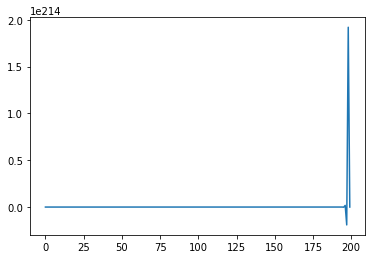

In [142]:
# 1D diffusion

nx = 200 # i space index
nt = 20 # n time index
dt = 0.01 ; vis = 0.1
dx = 2.0 / (nx - 1) # domain is (0;2)

# u(x)
u = np.zeros(nx)
x = np.linspace(0, 2, nx)

# initial conditions
for i in range(nx):
    if 0.5 <= x[i] <= 1:
        u[i] = 2
    else:
        u[i] = 1

# simulate
for n in range(nt):
    un = u
    for i in range(1, nx-1):
        u[i] = un[i] - vis * dt / dx / dx * (un[i+1] - 2 * un[i] + un[i-1])

plt.plot(u)

In [183]:
# 1D - Burgers
nx = 20; nt = 50
dt = 0.01; vis = 0.1
dx = 2/(nx - 1)

# u(x,t)
u = np.zeros(nx)
ua = np.zeros(nx)
x = np.linspace(0, 2, nx)

ip1 = np.copy(x)
im1 = np.copy(x)

for i in range(nx):
    ip1[i] = i + 1
    im1[i] = i - 1
    x[i] = (i - 1) * dx
    
ip1[nx-1] = 0
im1[0] = nx
    
for i in range(nx):
    phi = np.exp(-x[i]**2/4/vis) + np.exp(-(x[i]-2*np.pi)**2/4/vis)
    dphi = -0.5/vis*x[i]*np.exp(-x[i]**2/4/vis)-0.5/vis*(x[i]-2*np.pi)*np.exp(-(x[i]-2*np.pi)**2/4/vis)
    u[i]=-2*vis*dphi/phi+4

for it in range(nt):
    t = (it-1)*dt
    for i in range(nx):
        phi1 = np.exp(-(x[i]-4*t)**2/4/vis/(t+1))
        phi2 = np.exp(-(x[i]-4*t-2*np.pi)**2/4/vis/(t+1))
        phi = phi1 + phi2
        dphi1 = -0.5/vis/(t+1)*(x[i]-4*t)*np.exp(-(x[i]-4*t)**2/4/vis/(t+1))
        dphi2 = -0.5/vis/(t+1)*(x[i]-4*t-2*np.pi)*np.exp(-(x[i]-4*t-2*np.pi)**2/4/vis/t+1)
        dphi = dphi1 + dphi2
        ua[i] = -2*vis*dphi/phi+4
    un = u
    for i in range(nx):
        if ip1[i] == nx: continue
        if im1[i] == nx: continue
        u1 = un[i] - un[i]*dt/dx*(un[i]-un[im1[i]])
        u2 = vis*dt/dx**2*(un[ip1[i]]-2*un[i]+un[im1[i]])
        u[i] = u1 + u2
        
#plt.plot(u)

C:\Apps\Utils\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: divide by zero encountered in double_scalars
C:\Apps\Utils\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Apps\Utils\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: invalid value encountered in double_scalars


ZeroDivisionError: float division by zero

In [146]:
np.pi

3.141592653589793